# EDA and Preprocessing
Exploratory Data Analyzing for Understanding the Data
Preprocessing for analyzing

In [1]:
import sys
import csv
import math
import numpy as np
from operator import itemgetter
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale


import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

df_original = pd.read_csv('degrees-that-pay-back.csv')
df1=df_original.copy()
df_original = pd.read_csv('salaries-by-college-type.csv')
df2=df_original.copy()
df_original = pd.read_csv('salaries-by-region.csv')
df3=df_original.copy()


#eliminating the dollar sign for better calculation
dollar_cols = ['Starting Median Salary',
               'Mid-Career Median Salary',
               'Mid-Career 10th Percentile Salary',
               'Mid-Career 25th Percentile Salary',
               'Mid-Career 75th Percentile Salary',
               'Mid-Career 90th Percentile Salary']

def drop_dollars(df):
    for x in dollar_cols:
        df[x] = df[x].str.replace("$","")
        df[x] = df[x].str.replace(",","")
        df[x] = pd.to_numeric(df[x])
    return df

drop_dollars(df1)
drop_dollars(df2)
drop_dollars(df3)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,70300.0,35100.0,51200.0,100000.0,179000.0
316,Niagara University,Northeastern,36900.0,69700.0,44000.0,57000.0,92000.0,128000.0
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,66200.0,32800.0,44200.0,93300.0,181000.0
318,University of Southern Maine,Northeastern,39400.0,63600.0,40400.0,47900.0,85700.0,117000.0


In [2]:
df1.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [3]:
df2.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [4]:
df3.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


<AxesSubplot:>

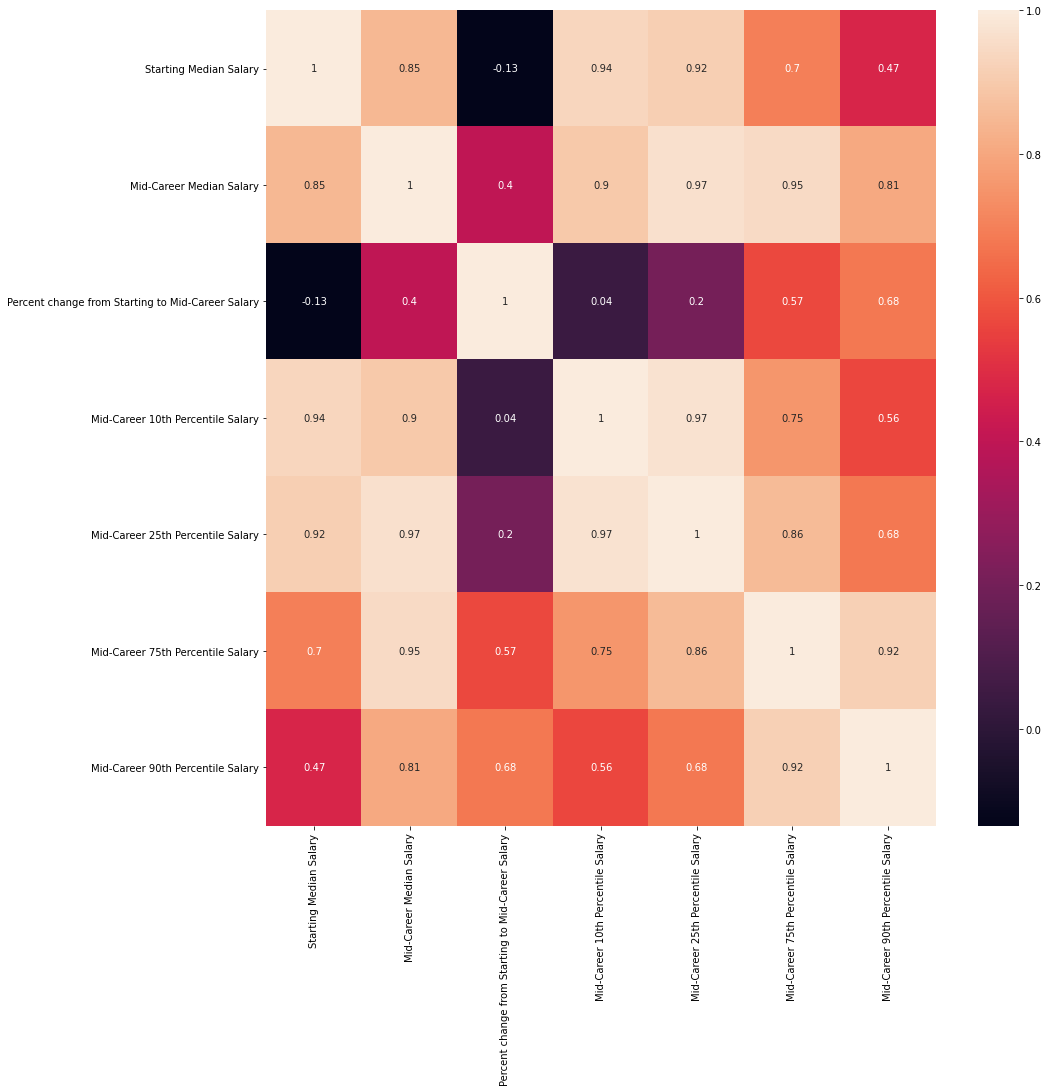

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(),annot=True)

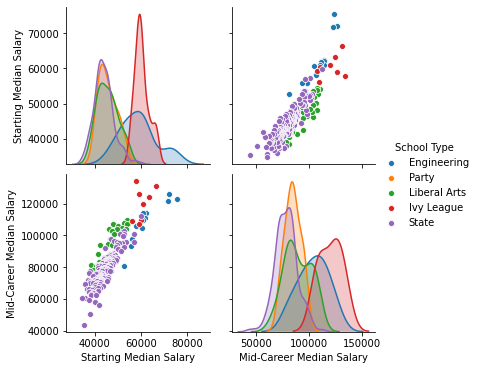

In [47]:
df = df2[['Starting Median Salary','Mid-Career Median Salary','School Type']]
sns.pairplot(df,hue='School Type')

<AxesSubplot:title={'center':'Mid-Career Median Salary depending on Region'}, xlabel='Region', ylabel='Mid-Career Median Salary'>

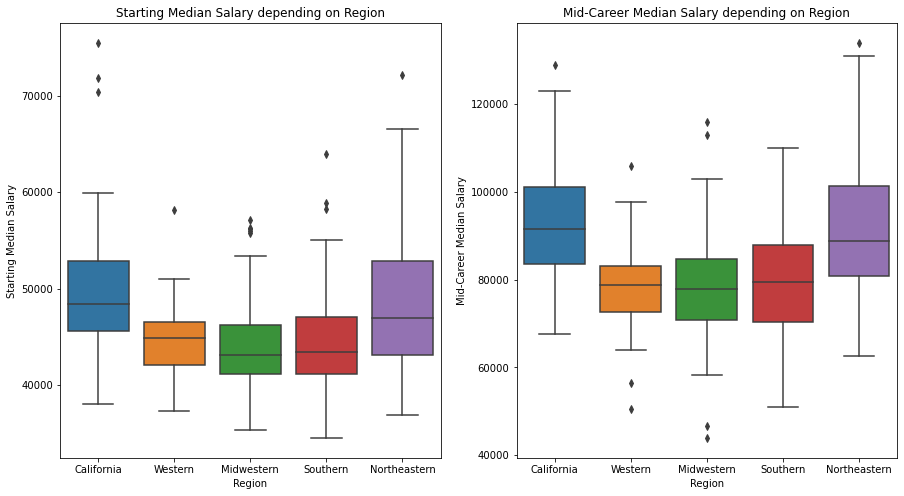

In [7]:
fig, ax = plt.subplots(figsize=(15,8), ncols=2, nrows=1)
y_title_margin = 1

ax[0].set_title("Starting Median Salary depending on Region", y = y_title_margin)
ax[1].set_title("Mid-Career Median Salary depending on Region", y = y_title_margin)

sns.boxplot(x='Region',y='Starting Median Salary', data=df3,ax=ax[0])
sns.boxplot(x='Region',y='Mid-Career Median Salary', data=df3,ax=ax[1])

In [8]:

#merging the salaries by college type dataframe and salaries by region dataframe
merge_inner = pd.merge(df2, df3, on="School Name", how='inner')
merge_inner['Starting Median Salary_y']=merge_inner['Starting Median Salary_x'].combine_first(merge_inner['Starting Median Salary_y'])
merge_inner['Mid-Career Median Salary_y']=merge_inner['Mid-Career Median Salary_x'].combine_first(merge_inner['Mid-Career Median Salary_y'])
merge_inner['Mid-Career 10th Percentile Salary_y']=merge_inner['Mid-Career 10th Percentile Salary_x'].combine_first(merge_inner['Mid-Career 10th Percentile Salary_y'])
merge_inner['Mid-Career 25th Percentile Salary_y']=merge_inner['Mid-Career 25th Percentile Salary_x'].combine_first(merge_inner['Mid-Career 25th Percentile Salary_y'])
merge_inner['Mid-Career 75th Percentile Salary_y']=merge_inner['Mid-Career 75th Percentile Salary_x'].combine_first(merge_inner['Mid-Career 75th Percentile Salary_y'])
merge_inner['Mid-Career 90th Percentile Salary_y']=merge_inner['Mid-Career 90th Percentile Salary_x'].combine_first(merge_inner['Mid-Career 90th Percentile Salary_y'])

merge_inner['Starting Median Salary_x']=merge_inner['Starting Median Salary_y'].combine_first(merge_inner['Starting Median Salary_x'])
merge_inner['Mid-Career Median Salary_x']=merge_inner['Mid-Career Median Salary_y'].combine_first(merge_inner['Mid-Career Median Salary_x'])
merge_inner['Mid-Career 10th Percentile Salary_x']=merge_inner['Mid-Career 10th Percentile Salary_y'].combine_first(merge_inner['Mid-Career 10th Percentile Salary_x'])
merge_inner['Mid-Career 25th Percentile Salary_x']=merge_inner['Mid-Career 25th Percentile Salary_y'].combine_first(merge_inner['Mid-Career 25th Percentile Salary_x'])
merge_inner['Mid-Career 75th Percentile Salary_x']=merge_inner['Mid-Career 75th Percentile Salary_y'].combine_first(merge_inner['Mid-Career 75th Percentile Salary_x'])
merge_inner['Mid-Career 90th Percentile Salary_x']=merge_inner['Mid-Career 90th Percentile Salary_y'].combine_first(merge_inner['Mid-Career 90th Percentile Salary_x'])


merge_inner=merge_inner.drop(merge_inner.columns[[2,3,4,5,6,7]], axis='columns')
merge_inner=merge_inner.dropna(axis=0) # eliminating the rows with nan values
#changing the name of columns for easier identifying
merge_inner.columns = ['school_name','school_type','region',
                       'school_start_50','school_mid_50',
                       'school_mid_10','school_mid_25','school_mid_75','school_mid_90']

df1.columns = ['major', 'major_start_50','major_mid_50','major_percent_change',
                       'major_mid_10','major_mid_25','major_mid_75','major_mid_90']

#calculating percent change for a school
merge_inner['school_percent_change']=(merge_inner['school_mid_50']-merge_inner['school_start_50'])/merge_inner['school_start_50']
merge_inner.head()

,school_name,school_type,region,school_start_50,school_mid_50,school_mid_10,school_mid_25,school_mid_75,school_mid_90,school_percent_change
0,Massachusetts Institute of Technology (MIT),Engineering,Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,0.745152
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,0.826923
5,Worcester Polytechnic Institute (WPI),Engineering,Northeastern,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,0.868852
6,Carnegie Mellon University (CMU),Engineering,Northeastern,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,0.796117
7,Rensselaer Polytechnic Institute (RPI),Engineering,Northeastern,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,0.800327


# Creating pseudo dataset
simulated students

In [9]:
simulated=pd.DataFrame()
simulated=pd.concat([simulated,merge_inner])
simulated=simulated.sample(frac=30, replace=True)
simulated = simulated.reset_index()
simulated=simulated.drop(simulated.columns[[0]], axis='columns')

major_sample=df1.sample(frac=138, replace=True)
major_sample = major_sample.reset_index()
major_sample=major_sample.drop(major_sample.columns[[0]], axis='columns')

simulated=pd.concat([simulated,major_sample], axis=1)

#setting the target with noise (for standard deviation)
simulated['percent_change']=((simulated['school_percent_change']+simulated['major_percent_change']))/2
noise=pd.Series(5*np.random.randn(len(simulated['percent_change'])))

simulated['percent_change']+=noise

#dropping out the school name column
simulated=simulated.drop(simulated.columns[[0]], axis='columns')
simulated = simulated[['percent_change','school_type', 'region', 'school_start_50', 'school_mid_50',
       'school_mid_10', 'school_mid_25', 'school_mid_75', 'school_mid_90',
       'school_percent_change', 'major', 'major_start_50', 'major_mid_50',
       'major_percent_change', 'major_mid_10', 'major_mid_25', 'major_mid_75',
       'major_mid_90']]
simulated

,percent_change,school_type,region,school_start_50,school_mid_50,school_mid_10,school_mid_25,school_mid_75,school_mid_90,school_percent_change,major,major_start_50,major_mid_50,major_percent_change,major_mid_10,major_mid_25,major_mid_75,major_mid_90
0,26.401739,State,Western,43800.0,78700.0,41600.0,55400.0,101000.0,132000.0,0.796804,Health Care Administration,38800.0,60600.0,56.2,34600.0,45600.0,78800.0,101000.0
1,32.197584,State,Northeastern,45600.0,78200.0,36300.0,53800.0,109000.0,151000.0,0.714912,Management Information Systems (MIS),49200.0,82300.0,67.3,45300.0,60500.0,108000.0,146000.0
2,36.047895,Ivy League,Northeastern,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,0.970443,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
3,35.596636,Party,California,50500.0,95000.0,51300.0,71200.0,129000.0,173000.0,0.881188,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
4,39.819693,Party,Midwestern,44700.0,83900.0,43300.0,61100.0,116000.0,163000.0,0.876957,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,34.072338,State,Southern,37500.0,64400.0,32100.0,46600.0,97100.0,129000.0,0.717333,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
6896,40.548135,Ivy League,Northeastern,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0,0.970443,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0
6897,48.373663,State,Southern,46500.0,79400.0,38700.0,51600.0,114000.0,158000.0,0.707527,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
6898,33.913744,Engineering,Northeastern,48900.0,84600.0,45000.0,62100.0,112000.0,159000.0,0.730061,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0


In [10]:
simulated=simulated.drop(simulated.columns[[9,13]], axis='columns')
# preprocess the categorical variables into dummy variables
simulated=pd.get_dummies(simulated, columns = ['school_type'])
simulated=pd.get_dummies(simulated, columns = ['region'])
simulated=pd.get_dummies(simulated, columns = ['major'])
simulated
simulated.to_csv('simulated.csv')

# Modeling




Decision Tree
1. single test/train split (cross_val=0)
2. cross_validating(cross_val=1, run several times, changing the number of fold)


In [23]:
#controllers for malipulating the model
target_idx=1
cross_val=1
norm_target=0
norm_features=0
binning=0
bin_cnt=2
feat_select=0
fs_type=2
feat_start=2

rand_st=1


file1= csv.reader(open('simulated.csv'), delimiter=',', quotechar='"')

header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)

print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)


#Normalization setting
if norm_features==1:
    #Feature normalization for continuous values
    data_np= scale(X=data_np, axis=0, with_mean=True, with_std=True, copy=True)


#feature selection
if feat_select==1:
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st) 
        sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
                        
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Regressors####
if binning==0 and cross_val==0:
    #SciKit Decision Tree Regressor
    rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)
    rgr.fit(data_train, target_train)

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, rgr.predict(data_test)))
    print('Decision Tree RMSE:', scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, rgr.predict(data_test))
    print('Decision Tree Expl Var:', scores_Expl_Var)

####Cross-Val Regressors####
if binning==0 and cross_val==1:
    #Setup Crossval regression scorers
    scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
    #SciKit Decision Tree Regressor - Cross Val
    start_ts=time.time()
    rgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)
    scores = cross_validate(rgr, data_np, target_np, scoring=scorers, cv=5)

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Decision Tree RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("CV Runtime:", time.time()-start_ts)

['', 'percent_change', 'school_start_50', 'school_mid_50', 'school_mid_10', 'school_mid_25', 'school_mid_75', 'school_mid_90', 'major_start_50', 'major_mid_50', 'major_mid_10', 'major_mid_25', 'major_mid_75', 'major_mid_90', 'school_type_Engineering', 'school_type_Ivy League', 'school_type_Liberal Arts', 'school_type_Party', 'school_type_State', 'region_California', 'region_Midwestern', 'region_Northeastern', 'region_Southern', 'region_Western', 'major_Accounting', 'major_Aerospace Engineering', 'major_Agriculture', 'major_Anthropology', 'major_Architecture', 'major_Art History', 'major_Biology', 'major_Business Management', 'major_Chemical Engineering', 'major_Chemistry', 'major_Civil Engineering', 'major_Communications', 'major_Computer Engineering', 'major_Computer Science', 'major_Construction', 'major_Criminal Justice', 'major_Drama', 'major_Economics', 'major_Education', 'major_Electrical Engineering', 'major_English', 'major_Film', 'major_Finance', 'major_Forestry', 'major_Geogr

Random Forest(set cross_val above to 1 instead of 0)

1.Finding the optimal number of trees(changing n_estimators)

2.Feature selection(wrapper-based, feat_select=1 instead of 0)

3.Bagging(Cross_val=0)

In [39]:
#controllers for malipulating the model
target_idx=1
cross_val=0
norm_target=0
norm_features=0
binning=0
bin_cnt=2
feat_select=1
fs_type=2
feat_start=2

rand_st=1


file1= csv.reader(open('simulated.csv'), delimiter=',', quotechar='"')

header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)

print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)


#Normalization setting
if norm_features==1:
    #Feature normalization for continuous values
    data_np= scale(X=data_np, axis=0, with_mean=True, with_std=True, copy=True)


#feature selection
if feat_select==1:
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st) 
        sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
                        
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Regressors####
if binning==0 and cross_val==0:
    #SciKit Bagging Regressor - Cross Val
    start_ts=time.time()
    rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st)  
    bag = BaggingRegressor(base_estimator=rgr, max_samples=0.6, random_state=rand_st)
    bag.fit(data_train, target_train)

    scores_RMSE = math.sqrt(metrics.mean_squared_error(target_test, bag.predict(data_test)))
    print('Bagging RMSE:', scores_RMSE)
    scores_Expl_Var = metrics.explained_variance_score(target_test, bag.predict(data_test))
    print('Bagging Expl Var:', scores_Expl_Var)
####Cross-Val Regressors####
if binning==0 and cross_val==1:
    #Setup Crossval regression scorers
    scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
    #SciKit Random Forest Regressor - Cross Val
    start_ts=time.time()
    rgr = RandomForestRegressor(n_estimators=100, max_features=.33, max_depth=None, min_samples_split=3, criterion='mse', random_state=rand_st)   
    scores = cross_validate(estimator=rgr, X=data_np, y=target_np, scoring=scorers, cv=5)  

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Random Forest RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("CV Runtime:", time.time()-start_ts)

['', 'percent_change', 'school_start_50', 'school_mid_50', 'school_mid_10', 'school_mid_25', 'school_mid_75', 'school_mid_90', 'major_start_50', 'major_mid_50', 'major_mid_10', 'major_mid_25', 'major_mid_75', 'major_mid_90', 'school_type_Engineering', 'school_type_Ivy League', 'school_type_Liberal Arts', 'school_type_Party', 'school_type_State', 'region_California', 'region_Midwestern', 'region_Northeastern', 'region_Southern', 'region_Western', 'major_Accounting', 'major_Aerospace Engineering', 'major_Agriculture', 'major_Anthropology', 'major_Architecture', 'major_Art History', 'major_Biology', 'major_Business Management', 'major_Chemical Engineering', 'major_Chemistry', 'major_Civil Engineering', 'major_Communications', 'major_Computer Engineering', 'major_Computer Science', 'major_Construction', 'major_Criminal Justice', 'major_Drama', 'major_Economics', 'major_Education', 'major_Electrical Engineering', 'major_English', 'major_Film', 'major_Finance', 'major_Forestry', 'major_Geogr

Gradient Boosting Model and Neural Network

Normalization

In [41]:
#controllers for malipulating the model
target_idx=1
cross_val=1
norm_target=0
norm_features=0
binning=0
bin_cnt=2
feat_select=0
fs_type=2
feat_start=2

rand_st=1


file1= csv.reader(open('simulated.csv'), delimiter=',', quotechar='"')

header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)

print(header)
print(len(target),len(data))
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)


#Normalization setting
if norm_features==1:
    #Feature normalization for continuous values
    data_np= scale(X=data_np, axis=0, with_mean=True, with_std=True, copy=True)


#feature selection
if feat_select==1:
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    #Wrapper Select via model
    if fs_type==2:
        rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand_st) 
        sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)                   
        print ('Wrapper Select: ')

        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected:', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
                        
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)
    
    print('--ML Model Output--', '\n')

#Test/Train split
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Cross-Val Regressors####
if binning==0 and cross_val==1:
    #Setup Crossval regression scorers
    scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
    #SciKit Gradient Boosting - Cross Val
    start_ts=time.time()
    rgr=GradientBoostingRegressor(n_estimators=100, loss='ls', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    scores=cross_validate(estimator=rgr, X=data_np, y=target_np, scoring=scorers, cv=5)                                                                                                

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Gradient Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("Gradient Boosting CV Runtime:", time.time()-start_ts)


    #SciKit Ada Boosting - Cross Val
    start_ts=time.time()
    rgr=AdaBoostRegressor(n_estimators=100, base_estimator=None, loss='linear', learning_rate=0.5, random_state=rand_st)
    scores=cross_validate(estimator=rgr, X=data_np, y=target_np, scoring=scorers, cv=5)                                                                                                

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Ada Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Ada Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("Ada Boosting CV Runtime:", time.time()-start_ts)


    #SciKit Neural Network - Cross Val
    start_ts=time.time()
    rgr=MLPRegressor(activation='logistic', solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(10,), random_state=rand_st)
    scores=cross_validate(estimator=rgr, X=data_np, y=target_np, scoring=scorers, cv=5)                                                                                                

    scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
    scores_Expl_Var = scores['test_expl_var']
    print("Neural Network RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
    print("Neural Network Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
    print("Neural Network CV Runtime:", time.time()-start_ts)

['', 'percent_change', 'school_start_50', 'school_mid_50', 'school_mid_10', 'school_mid_25', 'school_mid_75', 'school_mid_90', 'major_start_50', 'major_mid_50', 'major_mid_10', 'major_mid_25', 'major_mid_75', 'major_mid_90', 'school_type_Engineering', 'school_type_Ivy League', 'school_type_Liberal Arts', 'school_type_Party', 'school_type_State', 'region_California', 'region_Midwestern', 'region_Northeastern', 'region_Southern', 'region_Western', 'major_Accounting', 'major_Aerospace Engineering', 'major_Agriculture', 'major_Anthropology', 'major_Architecture', 'major_Art History', 'major_Biology', 'major_Business Management', 'major_Chemical Engineering', 'major_Chemistry', 'major_Civil Engineering', 'major_Communications', 'major_Computer Engineering', 'major_Computer Science', 'major_Construction', 'major_Criminal Justice', 'major_Drama', 'major_Economics', 'major_Education', 'major_Electrical Engineering', 'major_English', 'major_Film', 'major_Finance', 'major_Forestry', 'major_Geogr